Importing Libraries and DataFrame

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('MoviesDataFrame.csv')
df

,release_date,title,genre,production_budget,domestic_gross,foreign_gross,worldwide_gross,roi
0,2010-02-05,Dear John,War,25.0,80.014842,62.018667,142.033509,468.134036
1,2010-02-05,Dear John,Romance,25.0,80.014842,62.018667,142.033509,468.134036
2,2010-02-05,Dear John,Drama,25.0,80.014842,62.018667,142.033509,468.134036
3,2010-02-12,Valentine's Day,Romance,52.0,110.500000,107.083674,217.569328,318.402554
4,2010-02-12,Valentine's Day,Comedy,52.0,110.500000,107.083674,217.569328,318.402554
...,...,...,...,...,...,...,...,...
1891,2019-07-12,Crawl,Action,17.0,39.014193,50.994163,90.008356,429.460918
1892,2019-07-12,Crawl,Horror,17.0,39.014193,50.994163,90.008356,429.460918
1893,2019-07-12,Crawl,Thriller,17.0,39.014193,50.994163,90.008356,429.460918
1894,2019-07-12,Crawl,Crime,17.0,39.014193,50.994163,90.008356,429.460918


Editting DataFrame for Target Data

In [2]:
# Creating Function for ROI
def roi (gross, budget):
    percentage = (gross-budget)/budget * 100
    return (percentage)

# Calculating ROI
df['domestic_roi'] = roi(df['domestic_gross'], df['production_budget'])
df['foreign_roi'] = roi(df['foreign_gross'], df['production_budget'])
df['worldwide_roi'] = roi(df['worldwide_gross'], df['production_budget'])

# Extracting the Month and Year
df['year'] = pd.DatetimeIndex(df['release_date']).year
df['month'] = pd.DatetimeIndex(df['release_date']).month

Organizing Target DataFrame

In [3]:
columnsorder = ['release_date', 'title', 'genre',
                #'year', 'month',
                'domestic_roi', 'foreign_roi', 'worldwide_roi']
df = df.reindex(columns=columnsorder)
df = df.sort_values('worldwide_roi', ascending=False, ignore_index=True)
df

,release_date,title,genre,domestic_roi,foreign_roi,worldwide_roi
0,2015-07-10,The Gallows,Thriller,22700.000000,20100.000000,41556.474000
1,2015-07-10,The Gallows,Mystery,22700.000000,20100.000000,41556.474000
2,2015-07-10,The Gallows,Horror,22700.000000,20100.000000,41556.474000
3,2012-01-06,The Devil Inside,Horror,5230.000000,4750.000000,10075.949000
4,2011-04-01,Insidious,Horror,3500.610000,2766.666667,6558.059067
...,...,...,...,...,...,...
1891,2018-06-15,Tag,Action,95.466518,-16.428571,175.093521
1892,2018-06-15,Tag,Fantasy,95.466518,-16.428571,175.093521
1893,2018-06-15,Tag,Horror,95.466518,-16.428571,175.093521
1894,2018-06-15,Tag,Documentary,95.466518,-16.428571,175.093521


In [4]:
df.drop(df[df['worldwide_roi'] > 7000].index, inplace=True)

Visualizing Data

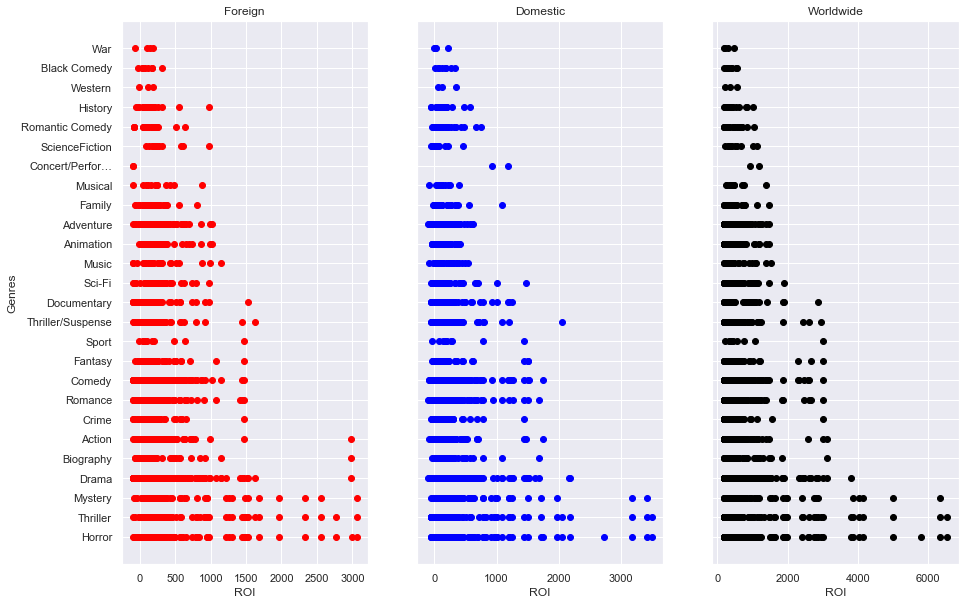

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()

# Important Values
x = df['genre']
f = df['foreign_roi']
d = df['domestic_roi']
w = df['worldwide_roi']

# Create Figure and Subplots
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize =(15, 10))

# Plot
ax1.scatter(f, x, color='red')  
ax2.scatter(d, x, color='blue')
ax3.scatter(w, x, color='black')

# Title, X and Y labels
ax1.set_title('Foreign'); ax2.set_title('Domestic'); ax3.set_title('Worldwide');
ax1.set_xlabel('ROI');  ax2.set_xlabel('ROI'); ax3.set_xlabel('ROI'); # x label
ax1.set_ylabel('Genres'); # y label

# Output the final plot
plt.show()

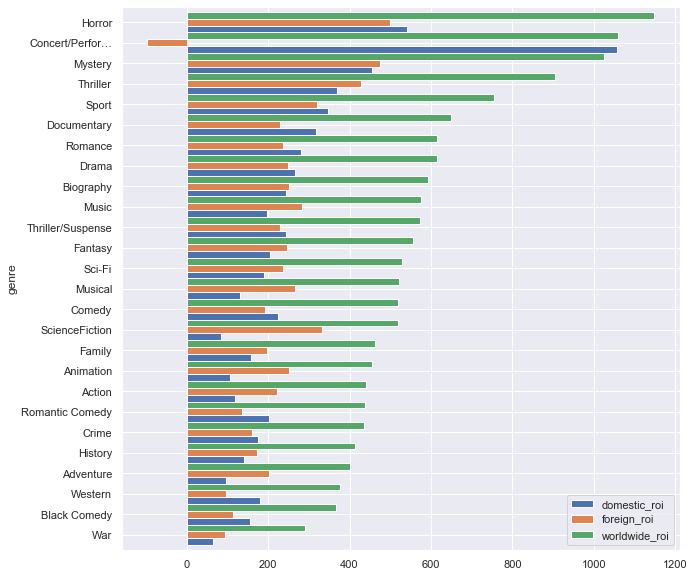

In [6]:
averageroi = df.groupby(['genre'], as_index=False).mean()
# averageroi = averageroi.drop(['year', 'month'], axis=1)
averageroi = averageroi.sort_values('worldwide_roi', ascending=True, ignore_index=True)
averageroi.plot.barh(x='genre', width=1, figsize=(10,10))

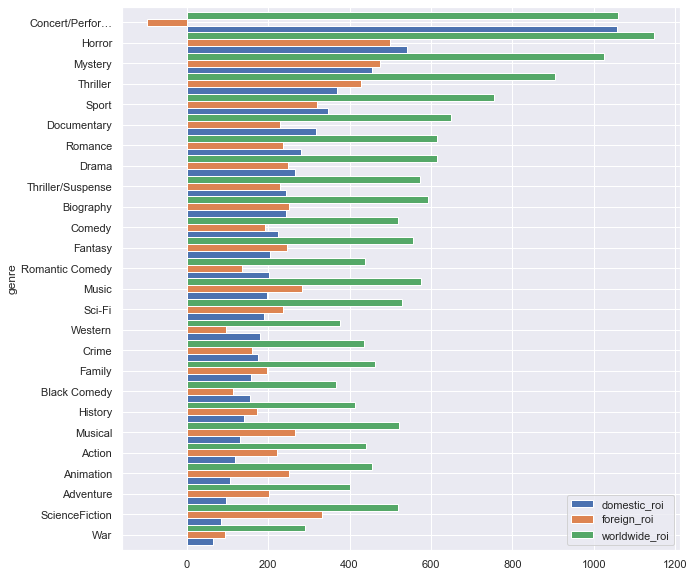

In [7]:
averageroi = averageroi.sort_values('domestic_roi', ignore_index=True)
averageroi.plot.barh(x='genre', width=1, figsize=(10,10))

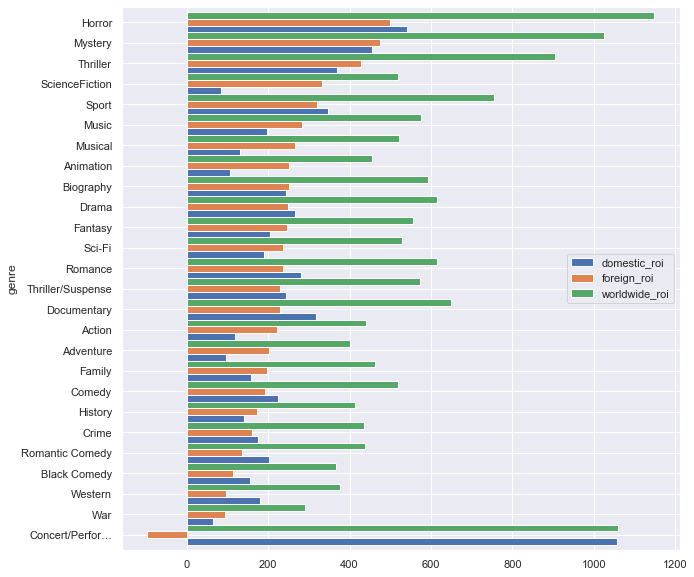

In [8]:
averageroi = averageroi.sort_values('foreign_roi', ignore_index=True)
averageroi.plot.barh(x='genre', width=1, figsize=(10,10))

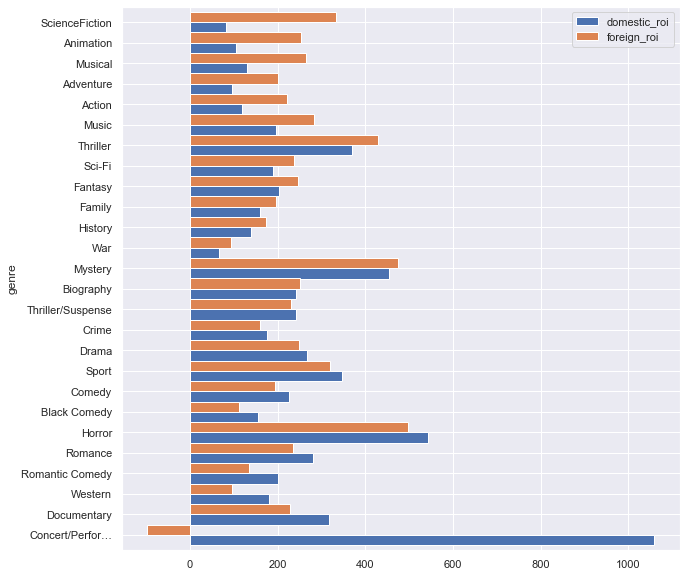

In [9]:
averageroi['difference'] = averageroi['foreign_roi'] - averageroi['domestic_roi']
foreignfocus = averageroi.sort_values('difference', ignore_index=True)
foreignfocus = foreignfocus.drop(['worldwide_roi', 'difference'], axis=1)
foreignfocus.plot.barh(x='genre', width=1, figsize=(10,10))